In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TCanvas, TLegend, gROOT, TFile, gPad, TPad, TF1, gStyle
import sys
gROOT.SetStyle("Plain")
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TBinomialEfficiencyFitter::result>:  chi2 21.144513 ndf 0 


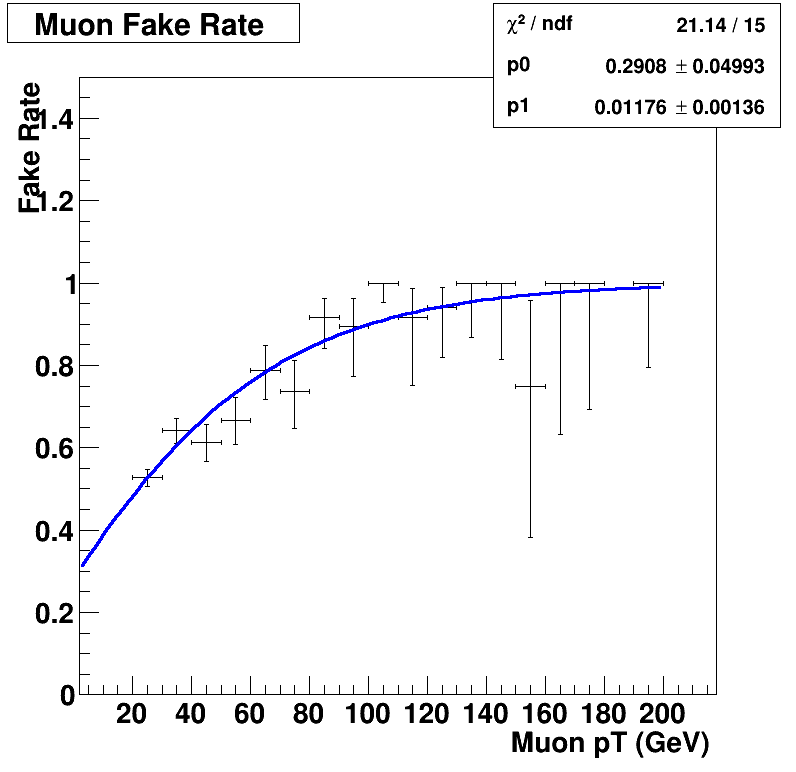

In [7]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frPt.root')
h = fi.Get('fakerate')
h.Draw()
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Muon Fake Rate; Muon pT (GeV); Fake Rate")
graph.SetMinimum(0.0)
graph.SetMaximum(1.5)
gPad.Update()
#f = TF1("Complex law","([0]/(1+ TMath::Exp(-[1]*(x-[2]))))", 0, 200)
#f.SetParameters(1, 1, 60)
f = TF1("Complex law","tanh([0]+x*[1])", 0, 200)
f.SetParameters(0, 0)
f.SetLineColor(4)
f.SetLineStyle(0)
h.Fit(f)
f.DrawClone("Same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TBinomialEfficiencyFitter::result>:  chi2 58.194540 ndf 0 


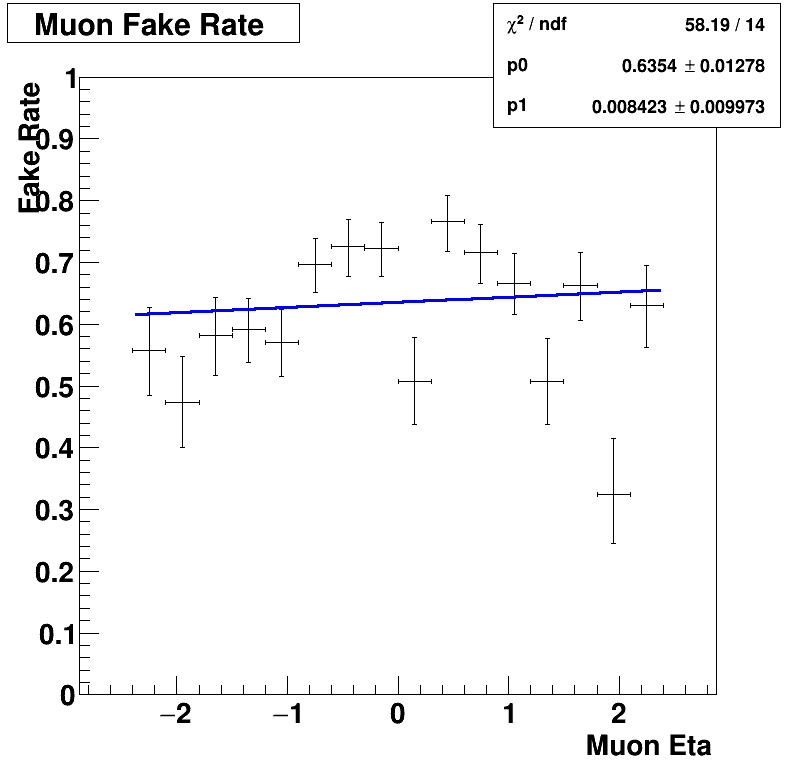

In [7]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frEta.root')
h = fi.Get('fakerate')
h.Draw()
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Muon Fake Rate; Muon Eta; Fake Rate")
graph.SetMinimum(0.0)
graph.SetMaximum(1.0)
gPad.Update()
f = TF1("Linear law","[0]+x*[1]", -2.4, 2.4)
f.SetLineColor(4)
f.SetLineStyle(0)
h.Fit(f)
f.DrawClone("Same")
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


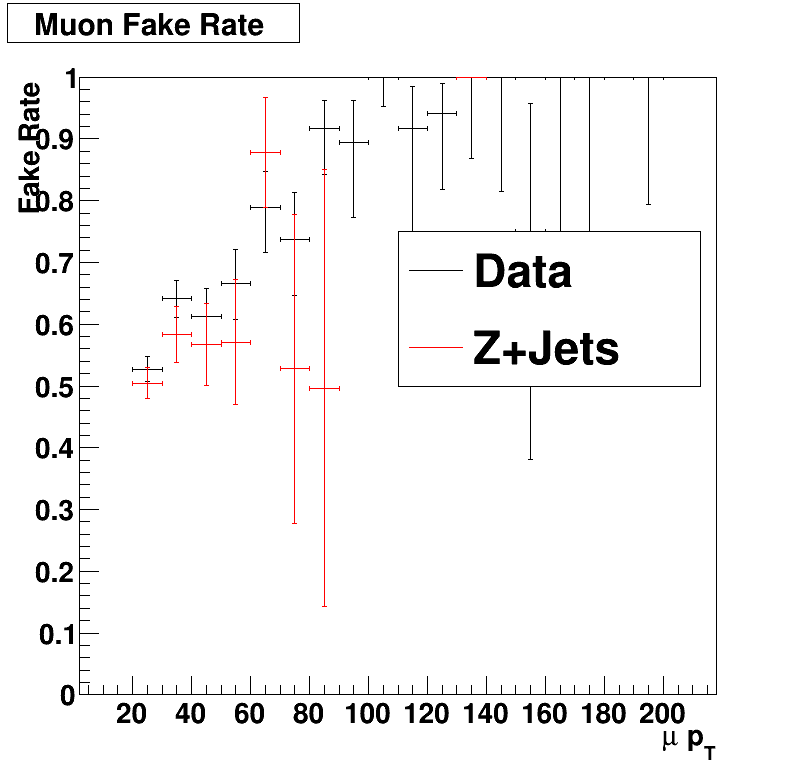

In [8]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
legend = TLegend(0.5,0.5,0.88,0.7)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frPt.root')
h = fi.Get('fakerate')
hdy = fi.Get('dyfakerate')
hdy.SetLineColor(2)
legend.AddEntry(h,"Data","l")
legend.AddEntry(hdy,"Z+Jets","l")
h.Draw()
hdy.Draw("SAME")
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Muon Fake Rate; #mu p_{T}; Fake Rate")
graph.SetMinimum(0)
graph.SetMaximum(1.0)
gPad.Update()
legend.Draw()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal


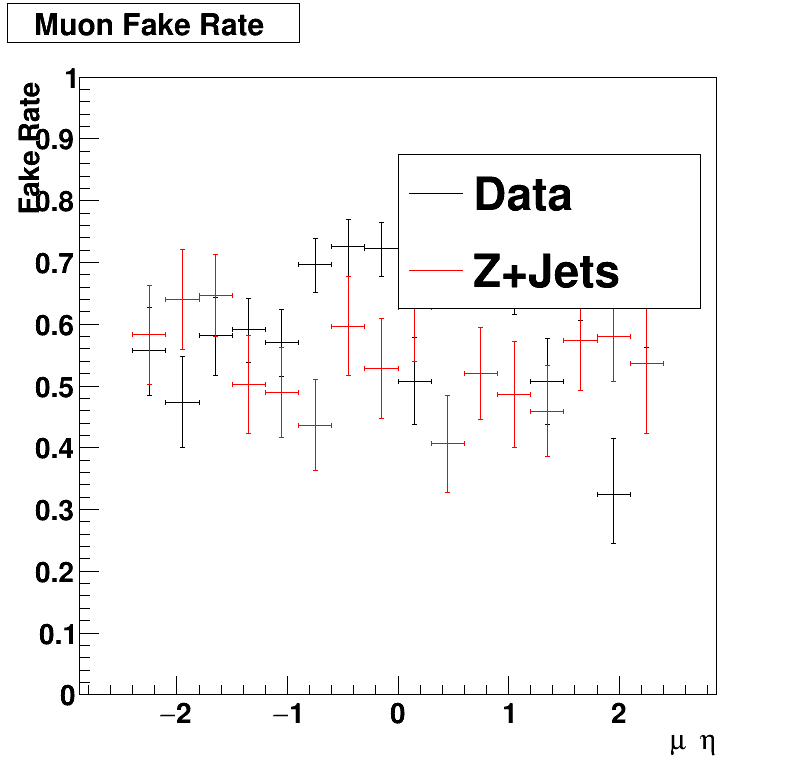

In [9]:
gStyle.SetOptFit(1)
canvas = TCanvas('canvas','canvas',800,800)
legend = TLegend(0.5,0.6,0.88,0.8)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw()
grid.cd()
fi = TFile('frEta.root')
h = fi.Get('fakerate')
hdy = fi.Get('dyfakerate')
hdy.SetLineColor(2)
legend.AddEntry(h,"Data","l")
legend.AddEntry(hdy,"Z+Jets","l")
h.Draw()
hdy.Draw("SAME")
gPad.Update()
graph = h.GetPaintedGraph()
h.SetTitle("Muon Fake Rate; #mu #eta; Fake Rate")
graph.SetMinimum(0)
graph.SetMaximum(1.0)
gPad.Update()
legend.Draw()
canvas.Draw()